# [NetworkX](https://networkx.github.io/documentation/networkx-2.3/)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
oo = float('inf')

In [2]:
# 创建无向图
G = nx.Graph()
G.add_node(1) # 添加节点１
G.add_edge(2,3) #　添加节点２，３并链接２３节点
print(G.nodes, G.edges, G.number_of_nodes(), G.number_of_edges())

[1, 2, 3] [(2, 3)] 3 1


In [3]:
# 创建有向图
G = nx.DiGraph() 
G.add_edge(2, 3)
G.add_edge(3, 2)
G.to_undirected()  # 转换成无向图
print(G.edges)

[(2, 3), (3, 2)]


In [4]:
# 加权图
G = nx.DiGraph()
G.add_weighted_edges_from([(0,1,3.0), (1,2,7.5)]) # 给０１边加权３，　１２边加权７．５
print(G.get_edge_data(1,2))  # 获得１２边的属性
G.add_weighted_edges_from([(2,3,5)], weight='color')
print(G.edges.data())
G.node[1]['size'] = 10
print(G.nodes.data())

{'weight': 7.5}
[(0, 1, {'weight': 3.0}), (1, 2, {'weight': 7.5}), (2, 3, {'color': 5})]
[(0, {}), (1, {'size': 10}), (2, {}), (3, {})]


In [5]:
g_data = [(1, 2, 6), (1, 3, 1), (1, 4, 5),
          (2, 3, 5),  (2, 5, 3),
          (3, 4, 5), (3, 5, 6), (3, 6, 4), (4, 6, 2),
          (5, 6, 6)]

In [6]:
# 最小生成树
g = nx.Graph()
g.add_weighted_edges_from(g_data)
tree = nx.minimum_spanning_tree(g, algorithm='prim')
print(tree.edges(data=True))

[(1, 3, {'weight': 1}), (2, 3, {'weight': 5}), (2, 5, {'weight': 3}), (3, 6, {'weight': 4}), (4, 6, {'weight': 2})]


In [7]:
# 最短路径
G = nx.path_graph(5)  # 0-1-2-3-4链
print(nx.dijkstra_path(G, 0, 4))

[0, 1, 2, 3, 4]


In [8]:
# 所有节点之间的最短路径
G = nx.Graph()
G.add_weighted_edges_from(g_data)
gen = nx.all_pairs_shortest_path(G)
print(dict(gen))

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 2, 5], 6: [1, 3, 6]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 5: [2, 5], 4: [2, 1, 4], 6: [2, 3, 6]}, 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 4], 5: [3, 5], 6: [3, 6]}, 4: {4: [4], 1: [4, 1], 3: [4, 3], 6: [4, 6], 2: [4, 1, 2], 5: [4, 3, 5]}, 5: {5: [5], 2: [5, 2], 3: [5, 3], 6: [5, 6], 1: [5, 2, 1], 4: [5, 3, 4]}, 6: {6: [6], 3: [6, 3], 4: [6, 4], 5: [6, 5], 1: [6, 3, 1], 2: [6, 3, 2]}}


In [9]:
# 各点之间可达性
G = nx.Graph()
G.add_weighted_edges_from(g_data)
print(nx.communicability(G))

{1: {1: 5.269088285128803, 2: 4.612819690152336, 3: 6.378804644631198, 4: 4.612819690152337, 5: 3.8717917686287584, 6: 3.871791768628758}, 2: {1: 4.612819690152336, 2: 5.2690882851288015, 3: 6.378804644631196, 4: 3.871791768628759, 5: 4.612819690152335, 6: 3.8717917686287584}, 3: {1: 6.378804644631198, 2: 6.378804644631196, 3: 9.480701913428609, 4: 6.378804644631198, 5: 6.378804644631199, 6: 6.378804644631199}, 4: {1: 4.612819690152337, 2: 3.871791768628759, 3: 6.378804644631198, 4: 5.269088285128803, 5: 3.8717917686287584, 6: 4.612819690152335}, 5: {1: 3.8717917686287584, 2: 4.612819690152335, 3: 6.378804644631199, 4: 3.8717917686287584, 5: 5.269088285128805, 6: 4.612819690152338}, 6: {1: 3.871791768628758, 2: 3.8717917686287584, 3: 6.378804644631199, 4: 4.612819690152335, 5: 4.612819690152338, 6: 5.269088285128805}}


In [10]:
# 获得图中非连通点的列表
G = nx.Graph()
G.add_edge(1,2)
G.add_node(3)
print(list(nx.isolates(G)))

[3]


In [11]:
# 遍历
G = nx.Graph()
G.add_weighted_edges_from(g_data)
d_gen = nx.dfs_edges(G,1)  #  按边深度搜索, 1为起点
b_gen = nx.bfs_edges(G,1)
print(list(d_gen), list(b_gen))
print(nx.dfs_tree(G,1).nodes())  # 按点深搜

[(1, 2), (2, 3), (3, 4), (4, 6), (6, 5)] [(1, 2), (1, 3), (1, 4), (2, 5), (3, 6)]
[1, 2, 3, 4, 6, 5]


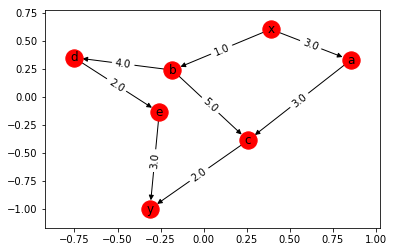

In [12]:
from networkx.algorithms.flow import shortest_augmenting_path
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge('x','a', capacity=3.0)
G.add_edge('x','b', capacity=1.0)
G.add_edge('a','c', capacity=3.0)
G.add_edge('b','c', capacity=5.0)
G.add_edge('b','d', capacity=4.0)
G.add_edge('d','e', capacity=2.0)
G.add_edge('c','y', capacity=2.0)
G.add_edge('e','y', capacity=3.0)

# 将参数画到图上
pos = nx.spring_layout(G)
capacity = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,capacity)
plt.show()

In [13]:
# 最大流
flow_value, flow_dict = nx.maximum_flow(G,'x', 'y', flow_func=shortest_augmenting_path)
print(flow_value, flow_dict)

3.0 {'x': {'a': 2.0, 'b': 1.0}, 'a': {'c': 2.0}, 'b': {'c': 0, 'd': 1.0}, 'c': {'y': 2.0}, 'd': {'e': 1.0}, 'e': {'y': 1.0}, 'y': {}}


In [14]:
# 最小成本流
G = nx.DiGraph()
G.add_node('a', demand = -5)
G.add_node('d', demand = 5)
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)
flow_cost, flow_dict = nx.capacity_scaling(G)
print(flow_cost, flow_dict)

24 {'a': {'b': 4, 'c': 1}, 'd': {}, 'b': {'d': 4}, 'c': {'d': 1}}


In [15]:
# 欧拉回路  一个无向图G,一条路径经过图G的每一条边,且仅经过一次,这条路径称为欧拉路径．如果起点和终点同一点，则为欧拉回路
# 无向图：每个顶点的度数都是偶数则存在欧拉回路
# 有向图：每个顶点的入度都等于出度则存在欧拉回路
DG = nx.DiGraph({0: [3], 1: [2], 2: [3], 3: [0, 1]})
G = nx.Graph({0: [1,2], 1: [0,2], 2: [0,1,3,4], 3: [2,4], 4:[2,3]})
print(nx.is_eulerian(DG))
print(nx.is_eulerian(G))
print(list(nx.eulerian_circuit(DG)))
print(list(nx.eulerian_circuit(G)))

True
True
[(0, 3), (3, 1), (1, 2), (2, 3), (3, 0)]
[(0, 2), (2, 4), (4, 3), (3, 2), (2, 1), (1, 0)]


In [16]:
# 最小点割集
node_cut = nx.minimum_node_cut(G, flow_func=shortest_augmenting_path)
print(node_cut)

{2}


In [17]:
# 对于带权无向图边切割，得到最小切割权之和，以及两个分离区域
G = nx.Graph()
G.add_edge('x','a', weight=3)
G.add_edge('x','b', weight=1)
G.add_edge('a','c', weight=3)
G.add_edge('b','c', weight=5)
G.add_edge('b','d', weight=4)
G.add_edge('d','e', weight=2)
G.add_edge('c','y', weight=2)
G.add_edge('e','y', weight=3)

cut_value, partition = nx.stoer_wagner(G)
print(cut_value, partition)

4 (['y', 'e'], ['c', 'a', 'b', 'x', 'd'])


In [18]:
# 最大权重匹配　匈牙利、KM算法
G = nx.Graph()
G.add_weighted_edges_from([('A', 'a', 3), ('A', 'c', 4), ('B', 'a', 2), ('B', 'b', 1), ('B', 'c', 3), ('C', 'c', 5)])
print(nx.max_weight_matching(G))

{('c', 'C'), ('b', 'B'), ('a', 'A')}


In [19]:
# 拓扑排序
G = nx.DiGraph()
G.add_edge('x','a', weight=3)
G.add_edge('a','c', weight=3)
G.add_edge('b','c', weight=5)
G.add_edge('b','d', weight=4)
G.add_edge('d','e', weight=2)
G.add_edge('c','y', weight=2)
G.add_edge('e','y', weight=3)
print(list(nx.topological_sort(G)))

['b', 'd', 'e', 'x', 'a', 'c', 'y']


In [20]:
# 最小成本最大流
G = nx.DiGraph()
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)
print(nx.max_flow_min_cost(G, 'a', 'd'))

{'a': {'b': 4, 'c': 5}, 'b': {'d': 4}, 'c': {'d': 5}, 'd': {}}


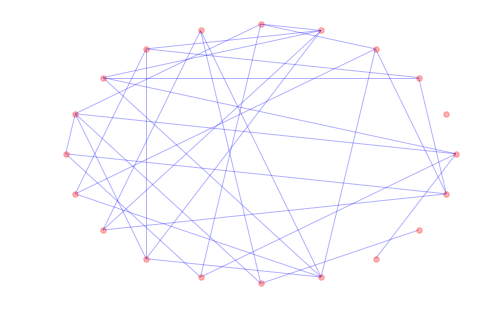

In [21]:
#复杂网络生成
# ER随机图   # 随机生成20个节点，节点间的连接概率都是0.2
ER = nx.random_graphs.erdos_renyi_graph(20, 0.2)
pos = nx.shell_layout(ER)
nx.draw(ER, pos, with_labels=False,edge_color='b', alpha=0.3, node_size=30)
plt.show()

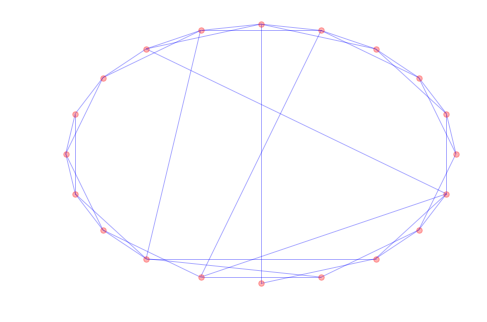

In [22]:
# WS小世界网络  生成一个含有n个节点、每个节点有k个邻居、以概率p随机化重连边的WS小世界网络。
WS = nx.random_graphs.watts_strogatz_graph(20, 4, 0.3)
pos = nx.circular_layout(WS)
nx.draw(WS, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
plt.show()

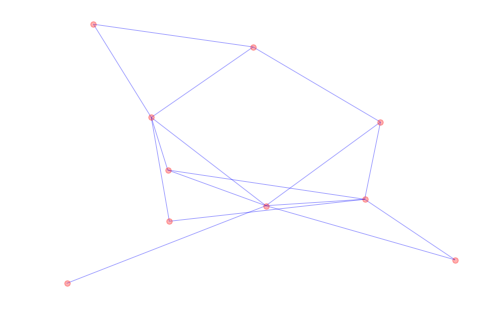

In [23]:
# BA无标度网络 生成一个含有n个节点、每次加入m条边的BA无标度网络
BA = nx.random_graphs.barabasi_albert_graph(10,2)
pos = nx.spring_layout(BA)
nx.draw(BA, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
plt.show()

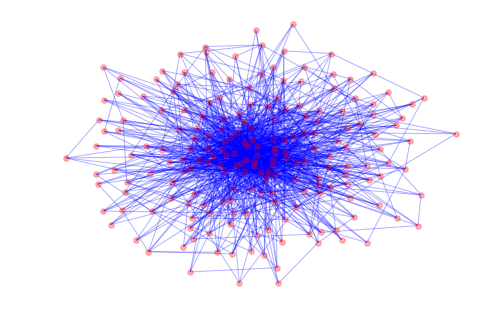

In [24]:
# 扩展ＢＡ无标度网络  节点数，添加新边数，两点间添加边的概率，边重连的概率
ExBA = nx.random_graphs.extended_barabasi_albert_graph(200, 4, 0.4, 0.2)
pos = nx.spring_layout(ExBA)
nx.draw(ExBA, pos, with_labels=False, node_size=30, edge_color='b', alpha=0.3)
plt.show()